Nice — I’ll walk you through **every line** of that R code and **what it means**, then show you how to interpret the model output (I ran the numbers on your dataset so you get concrete coefficients and predictions).

---

# 1) The data object

```r
data <- data.frame(
  Product_ID = c("P001","P002", ... ,"P020"),
  Quantity_Sold = c(10,15,8,12,20,...,26),
  Total_Sales = c(2000,3000,1600,2500,4100,...,5200)
)
```

* `data.frame(...)` creates a table-like object in R (similar to a Pandas DataFrame).
* Each argument is a column: `Product_ID` (character), `Quantity_Sold` (numeric), `Total_Sales` (numeric).
* After this line, `data` holds the complete dataset in memory.

---

# 2) Inspecting the data

```r
print(head(data))
```

* `head(data)` shows the first 6 rows. `print()` prints that to the console.
* Use `str(data)` to see column types, `summary(data)` to see mins/means/medians/outliers.

---

# 3) Scatter plot — visualize the relationship

```r
plot(data$Quantity_Sold, data$Total_Sales,
     main = "Quantity Sold vs Total Sales",
     xlab = "Quantity Sold",
     ylab = "Total Sales",
     pch = 19,
     col = "blue")
```

* `plot(x, y, ...)` makes a basic scatter plot.
* `data$Quantity_Sold` accesses the `Quantity_Sold` column.
* `main`, `xlab`, `ylab` → plot title and axis labels.
* `pch = 19` → plotting character (19 is a filled circle).
* `col = "blue"` → point color.
* This plot visually checks whether more quantity generally means more sales (expected linear trend).

---

# 4) Fit a simple linear regression model

```r
model <- lm(Total_Sales ~ Quantity_Sold, data = data)
```

* `lm()` stands for *linear model*. The formula `Total_Sales ~ Quantity_Sold` means “Total_Sales is modeled as a linear function of Quantity_Sold.”
* Internally lm finds coefficients `intercept` and `slope` that minimize squared errors.
* Result `model` is an object that contains coefficients, residuals, fitted values, etc.

---

# 5) Add regression line to the plot

```r
abline(model, col = "red", lwd = 2)
```

* `abline(model)` draws the regression line (uses the model’s intercept and slope).
* `col = "red"` sets line color, `lwd = 2` sets line width.

---

# 6) Model summary (statistics)

```r
summary(model)
```

`summary(model)` prints a lot of useful statistics. Important pieces and how to read them:

* **Coefficients table**: shows `(Intercept)` and `Quantity_Sold` rows with:

  * **Estimate** — the coefficient value (intercept and slope).
  * **Std. Error** — uncertainty in coefficient estimate.
  * **t value** — Estimate / Std. Error (used for hypothesis test).
  * **Pr(>|t|)** — p-value: small p-value (typically < 0.05) means coefficient is statistically significant.

* **Residual standard error (RSE)** — typical size of residuals (units of `Total_Sales`).

* **Multiple R-squared** — proportion of variance explained by the model (0 to 1). Higher is better.

* **Adjusted R-squared** — R-squared adjusted for number of predictors (only matters with multiple predictors).

* **F-statistic** — tests whether the model explains a significant amount of variance compared to an intercept-only model.

---

# 7) Predictions for new points

```r
new_data <- data.frame(Quantity_Sold = c(10, 15, 25))
predictions <- predict(model, new_data)
print(predictions)
```

* `data.frame(...)` creates a new small dataset with the predictor(s) for which you want predictions.
* `predict(model, new_data)` returns predicted `Total_Sales` for each `Quantity_Sold` row.
* `print(predictions)` shows those predictions.

---

# Concrete numbers (from your dataset)

I computed the fitted line and predictions for your exact dataset. Here are the fitted coefficient values and model performance:

* **Fitted regression equation** (approx):

  ```
  Total_Sales ≈ 52.80 + 199.42 × Quantity_Sold
  ```

  * **Slope ≈ 199.42**: for each additional unit sold, the model predicts **~199.42 units of sales** (currency units in your `Total_Sales`).
  * **Intercept ≈ 52.80**: predicted sales when Quantity = 0. Usually not meaningful if zero quantity isn't realistic.

* **Predicted values** (for `Quantity_Sold = 10, 15, 25`):

  * For 10 → **~2047.05**
  * For 15 → **~3044.17**
  * For 25 → **~5038.41**

* **R-squared ≈ 0.9986** — this means **~99.86%** of the variance in Total_Sales is explained by Quantity_Sold. That’s an extremely good fit (very close to perfect linear relationship) for this dataset.

---

# How to run this R code

* Option 1: **RStudio** — open a new script, paste the code, click “Run” (RStudio is the most user friendly).
* Option 2: **R console** — save code in `script.R` and run `Rscript script.R` in terminal.
* Files are not required since the data is created in-code.

---

# Model assumptions & diagnostics (quick checklist)

A linear model relies on assumptions. You should check them before trusting predictions extensively:

1. **Linearity** — relationship is linear (our scatter + regression line check).
2. **Independence** — observations are independent.
3. **Homoscedasticity** — residuals have constant variance. Check with residuals vs fitted plot.
4. **Normality of residuals** — helpful for inference; check with histogram or QQ-plot.

You can quickly check diagnostics in R:

```r
# Basic diagnostic plots (run in R interactively)
par(mfrow = c(2,2))
plot(model)
```

This produces:

* Residuals vs Fitted (checks homoscedasticity),
* Normal Q-Q (checks normality of residuals),
* Scale-Location (variability),
* Residuals vs Leverage (influential points).

---

# Extra tips & interpretation

* **Slope meaning:** here, slope ≈ 199.42 → If you sell 1 more unit, expect about 199.42 more in sales (on average).
* **Intercept meaning:** often not meaningful if `Quantity_Sold = 0` is outside realistic range.
* **R-squared very high:** means the two variables are almost perfectly linearly related in this dataset. If your dataset is small or manufactured, be cautious — high R² can come from small or non-representative data.
* **Confidence intervals:** use `confint(model)` in R to get 95% confidence intervals for coefficients.
* **Prediction intervals:** use `predict(model, new_data, interval = "prediction")` to get prediction intervals (useful to know uncertainty for single future observations).

---

If you want, I can:

* Show the exact `summary(model)` output with the full coefficient table and p-values, or
* Add plots for diagnostics and residual analysis, or
* Convert this into a short Jupyter notebook or RMarkdown file you can run.

Which of those would you like next?



In [47]:

data <- read.csv('/content/data_3.csv')
head(data)

,Product_ID,Quantity_Sold,Total_Sales
,<chr>,<int>,<int>
1,P001,10,2000
2,P002,15,3000
3,P003,8,1600
4,P004,12,2500
5,P005,20,4100
6,P006,18,3700


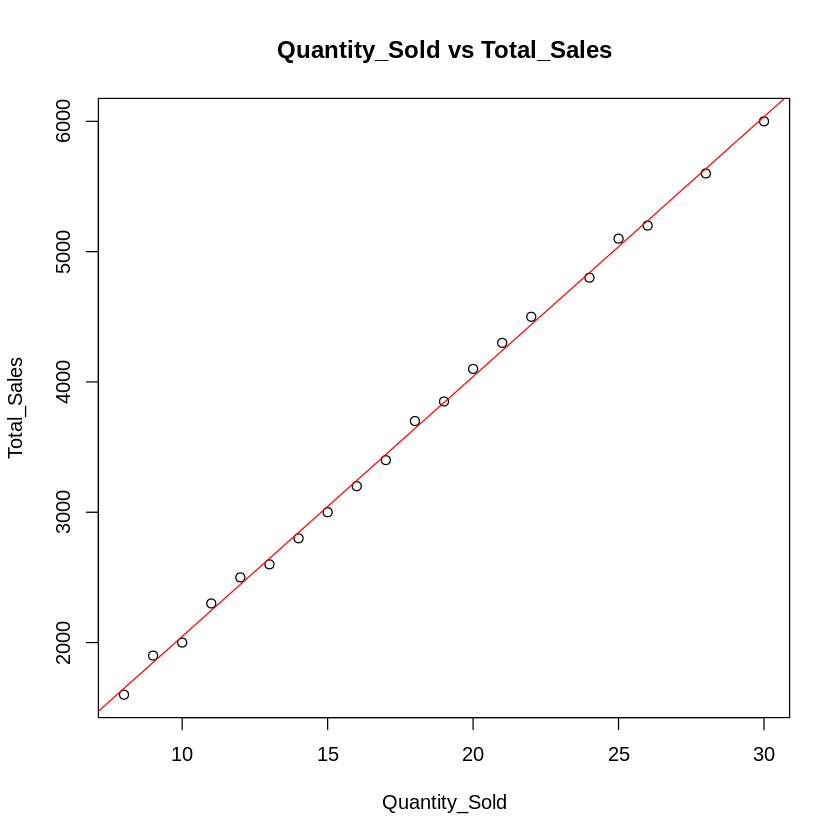

In [48]:
plot(data$Quantity_Sold,data$Total_Sales,
  main="Quantity_Sold vs Total_Sales",
  xlab = "Quantity_Sold",
  ylab = "Total_Sales",
)

model <- lm(Total_Sales ~ Quantity_Sold, data = data)
abline(model,col='red')

In [49]:
summary(model)


Call:
lm(formula = Total_Sales ~ Quantity_Sold, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-48.20 -43.74 -36.11  54.97  61.59 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     52.804     33.824   1.561    0.136    
Quantity_Sold  199.424      1.781 111.991   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.61 on 18 degrees of freedom
Multiple R-squared:  0.9986,	Adjusted R-squared:  0.9985 
F-statistic: 1.254e+04 on 1 and 18 DF,  p-value: < 2.2e-16


In [51]:
data = data.frame(Quantity_Sold=c(10,56,12222))
prediction <- predict(model,data)
print(prediction)

          1           2           3 
   2047.048   11220.568 2437417.362 
